

---
##Trabajo colaborativo final


---
En función del dataset escogido trabajar en un proceso de clasificación de acuerdo a la variable target.

**Indicaciones de la tarea**
- Pueden trabajar la tarea de manera individual o grupal
- Pueden trabajar con un dataset de su elección o usar el datasets que se ha analizado en las clases (diabetes.csv)
- El notebook debe estar estructurado en las siguientes fases:
  1. Integrante(s) de grupo:
  - Anny Consuelo Arias Figueroa
  - Leonardo José Sullón Lévano
  2. Objetivo del análisis
  - Identificar cómo factores como la edad, el ejercicio, el sueño, la ingesta de azúcar, el consumo de alcohol y el tabaquismo influyen en el nivel de riesgo de salud.
  - Limpiar, codificar y escalar las variables numéricas y categóricas para preparar el dataset para los modelos de machine learning.
  - Entrenar y comparar al menos dos algoritmos de clasificación.
  - Utilizar métricas como accucary, recall, precision, F1-score y ROC-AUC para determinar cuál modelo tiene mejor desempeño.
  - Exportar el mejor modelo entrenado como archivo .pkl y un .csv con las predicciones realizadas, facilitando su futura integración o análisis.
  - Determinar cuálies caracteristicas del estilo de vida son más relevantes para predecir un riesgo alto de salud, aportando una visión preventiva en salud pública o bienestar personal.
  3. Formulación analítica: incluir el diccionario de datos
  4. Configuración inicial
  5. Recolección del dataset
  6. Análisis Exploratorio de Datos
  7. Transformación de Datos
  8. Modelado: al menos 2 modelos de clasificación revisados en las prácticas.
  9. Evaluación de modelos.
  10. Despliegue: a través de un modelo pkl y de un csv con los resultados de la clasificación. (revisar los notebooks de las clases 1 y 2)  

**Fecha de entrega de la tarea**

Jueves 23 de octubre de 2025 23h00 enviada a mi correo agonzaleze@continental.edu.pe


In [14]:
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("miadul/lifestyle-and-health-risk-prediction")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/miadul/lifestyle-and-health-risk-prediction/versions/1


In [18]:
df = pd.read_csv("/kaggle/input/lifestyle-and-health-risk-prediction/Lifestyle_and_Health_Risk_Prediction_Synthetic_Dataset.csv")
df.head()

,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi,health_risk
0,56,67,195,low,6.1,medium,yes,yes,yes,office_worker,17.6,high
1,69,76,170,high,6.9,high,no,no,no,teacher,26.3,high
2,46,106,153,high,6.6,low,yes,no,no,artist,45.3,high
3,32,54,186,medium,8.5,medium,no,no,no,artist,15.6,low
4,60,98,195,high,8.0,low,no,no,yes,teacher,25.8,high


# Formulación analítica + diccionario de datos

In [19]:
import pandas as pd

diccionario = pd.DataFrame([
    {"Variable":"age","Tipo":"numérica","Descripción":"Edad (años)","Notas":"aprox 18–80"},
    {"Variable":"weight","Tipo":"numérica","Descripción":"Peso (kg)","Notas":""},
    {"Variable":"height","Tipo":"numérica","Descripción":"Talla (cm)","Notas":""},
    {"Variable":"exercise","Tipo":"categórica","Descripción":"Nivel de ejercicio","Notas":"low/medium/high"},
    {"Variable":"sleep","Tipo":"numérica","Descripción":"Horas de sueño/día","Notas":"3–12 aprox."},
    {"Variable":"sugar_intake","Tipo":"categórica","Descripción":"Ingesta de azúcar","Notas":"low/medium/high"},
    {"Variable":"smoking","Tipo":"categórica","Descripción":"Hábito de fumar","Notas":"yes/no"},
    {"Variable":"alcohol","Tipo":"categórica","Descripción":"Consumo de alcohol","Notas":"yes/no"},
    {"Variable":"married","Tipo":"categórica","Descripción":"Estado civil","Notas":"yes/no"},
    {"Variable":"profession","Tipo":"categórica","Descripción":"Ocupación","Notas":"artist/teacher/..."},
    {"Variable":"bmi","Tipo":"numérica","Descripción":"Índice de masa corporal (kg/m²)","Notas":""},
    {"Variable":"health_risk","Tipo":"objetivo","Descripción":"Riesgo de salud","Notas":"low/medium/high"},
])
diccionario

,Variable,Tipo,Descripción,Notas
0,age,numérica,Edad (años),aprox 18–80
1,weight,numérica,Peso (kg),
2,height,numérica,Talla (cm),
3,exercise,categórica,Nivel de ejercicio,low/medium/high
4,sleep,numérica,Horas de sueño/día,3–12 aprox.
5,sugar_intake,categórica,Ingesta de azúcar,low/medium/high
6,smoking,categórica,Hábito de fumar,yes/no
7,alcohol,categórica,Consumo de alcohol,yes/no
8,married,categórica,Estado civil,yes/no
9,profession,categórica,Ocupación,artist/teacher/...


# Configuración inicial

In [20]:
import os, warnings, numpy as np, pandas as pd, matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score,
                             roc_curve, accuracy_score, f1_score, precision_score, recall_score)
import joblib

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

CSV_PATH = "Lifestyle_and_Health_Risk_Prediction_Synthetic_Dataset.csv"
TARGET_COL = "health_risk"

print("Configuración lista, archivo esperado: ", CSV_PATH)

Configuración lista, archivo esperado:  Lifestyle_and_Health_Risk_Prediction_Synthetic_Dataset.csv


#Recolección del dataset

In [22]:
df = pd.read_csv("/kaggle/input/lifestyle-and-health-risk-prediction/Lifestyle_and_Health_Risk_Prediction_Synthetic_Dataset.csv")
print("Dimensiones: ", df.shape)
display(df.head())
print("\nTipos de datos:")
print(df.dtypes)
print("\nValores únicos por columna (primeros 10): ")
for c in df.columns:
  uniq = df[c].unique()
  print(f" - {c}: {uniq[:10]}{"..." if len(uniq)>10 else ''}")

Dimensiones:  (5000, 12)


,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi,health_risk
0,56,67,195,low,6.1,medium,yes,yes,yes,office_worker,17.6,high
1,69,76,170,high,6.9,high,no,no,no,teacher,26.3,high
2,46,106,153,high,6.6,low,yes,no,no,artist,45.3,high
3,32,54,186,medium,8.5,medium,no,no,no,artist,15.6,low
4,60,98,195,high,8.0,low,no,no,yes,teacher,25.8,high



Tipos de datos:
age               int64
weight            int64
height            int64
exercise         object
sleep           float64
sugar_intake     object
smoking          object
alcohol          object
married          object
profession       object
bmi             float64
health_risk      object
dtype: object

Valores únicos por columna (primeros 10): 
 - age: [56 69 46 32 60 25 78 38 75 36]...
 - weight: [ 67  76 106  54  98  96  64  58  94  72]...
 - height: [195 170 153 186 160 168 194 158 147 178]...
 - exercise: ['low' 'high' 'medium' 'none']
 - sleep: [6.1 6.9 6.6 8.5 8.  3.8 9.9 9.6 8.1 7.4]...
 - sugar_intake: ['medium' 'high' 'low']
 - smoking: ['yes' 'no']
 - alcohol: ['yes' 'no']
 - married: ['yes' 'no']
 - profession: ['office_worker' 'teacher' 'artist' 'farmer' 'driver' 'engineer' 'student'
 'doctor']
 - bmi: [17.6 26.3 45.3 15.6 25.8 37.5 22.7 20.2 23.2 43.5]...
 - health_risk: ['high' 'low']


Análisis Exploratorio de Datos (EDA)

Nulos por columna (solo > 0): 


,0



Balance de clases (proporción):


,proportion
health_risk,
high,0.698
low,0.302


,age,weight,height,sleep,bmi
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,48.805600,77.359200,171.933200,6.997060,26.84388
std,17.906991,18.714567,15.822225,1.432849,8.25249
min,18.000000,45.000000,145.000000,3.000000,11.40000
25%,34.000000,61.000000,158.000000,6.000000,20.30000
50%,49.000000,77.000000,171.500000,7.000000,26.00000
75%,64.000000,94.000000,186.000000,8.000000,32.40000
max,79.000000,109.000000,199.000000,10.000000,51.40000


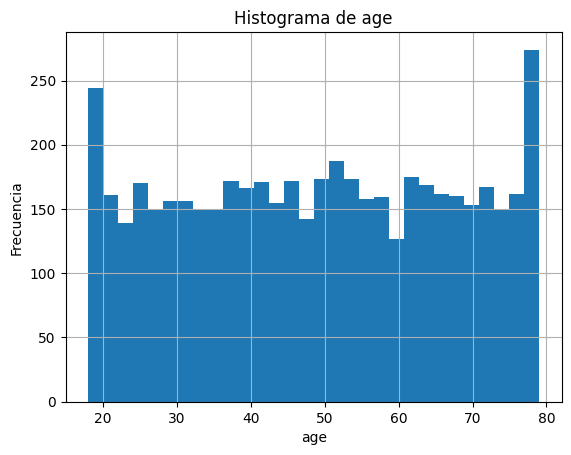

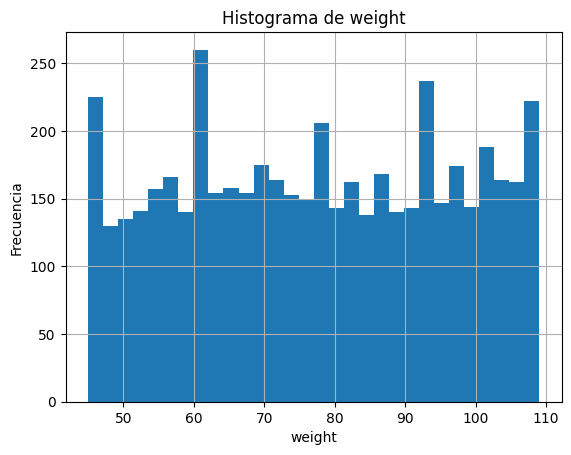

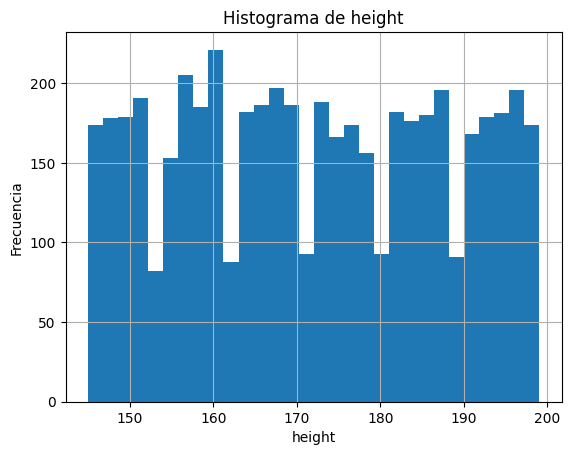

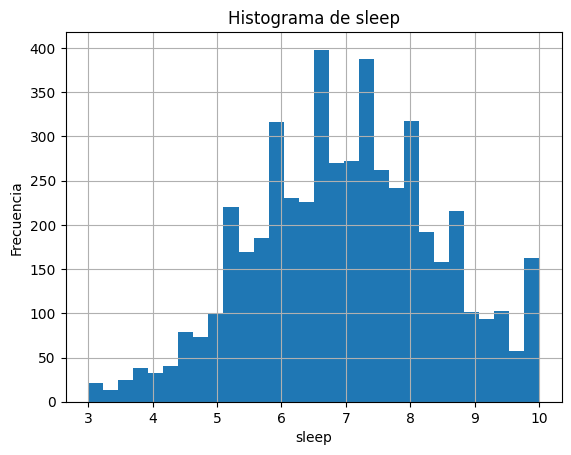

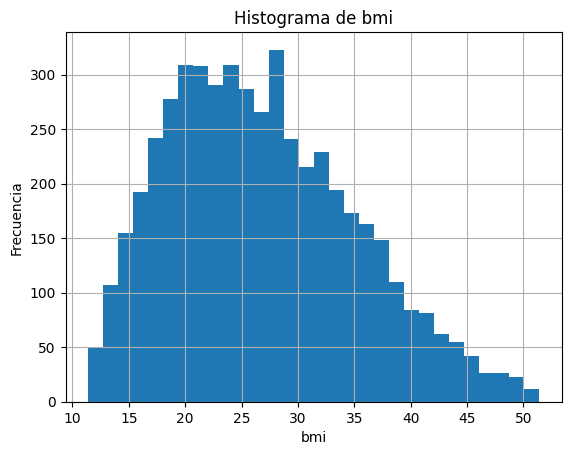

In [26]:
#Nulos
nulls = df.isna().sum(). sort_values(ascending=False)
print("Nulos por columna (solo > 0): ")
display(nulls[nulls>0])

#Balance de clases
if TARGET_COL not in df.columns:
  raise ValueError(f"No se encontro la columna objetivo: {TARGET_COL}")
print("\nBalance de clases (proporción):")
display(df[TARGET_COL].value_counts(normalize=True).rename('proportion'))

#Descripcion numerica
display(df.describe())

#Histogramas numericos
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
  plt.figure()
  df[col].dropna().hist(bins=30)
  plt.title(f"Histograma de {col}")
  plt.xlabel(col); plt.ylabel("Frecuencia")
  plt.show()


#Transformación de datos

In [27]:
y = df[TARGET_COL].astype(str)
X = df.drop(columns=[TARGET_COL])

num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)

print("X_train:", X_train.shape, "| X_test:", X_test.shape)
print("Numéricas:", num_cols)
print("Categóricas:", cat_cols)

X_train: (4000, 11) | X_test: (1000, 11)
Numéricas: ['age', 'weight', 'height', 'sleep', 'bmi']
Categóricas: ['exercise', 'sugar_intake', 'smoking', 'alcohol', 'married', 'profession']


#Modelado (2 modelos de clasificación)

In [28]:
# Dos modelos: Regresión Logística (multiclase) y Random Forest
logreg = Pipeline(steps=[
    ("prep", preprocessor),
    ("clf", LogisticRegression(max_iter=2000, multi_class="auto", random_state=RANDOM_STATE))
])

rf = Pipeline(steps=[
    ("prep", preprocessor),
    ("clf", RandomForestClassifier(n_estimators=400, random_state=RANDOM_STATE))
])

# Validación cruzada (F1-macro)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

def cv_metric(model, X, y, scoring="f1_macro"):
    scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
    return scores.mean(), scores.std()

for name, model in {"LogisticRegression": logreg, "RandomForest": rf}.items():
    mean_f1, std_f1 = cv_metric(model, X_train, y_train, scoring="f1_macro")
    print(f"{name} -> F1-macro CV: {mean_f1:.3f} ± {std_f1:.3f}")


LogisticRegression -> F1-macro CV: 0.855 ± 0.014
RandomForest -> F1-macro CV: 0.984 ± 0.004


#Evaluación de modelos


 LogisticRegression
Accuracy: 0.892 | F1-macro: 0.869 | F1-weighted: 0.891 | ROC AUC OvR: nan

Classification report:
              precision    recall  f1-score   support

        high       0.91      0.94      0.92       698
         low       0.84      0.79      0.82       302

    accuracy                           0.89      1000
   macro avg       0.88      0.86      0.87      1000
weighted avg       0.89      0.89      0.89      1000



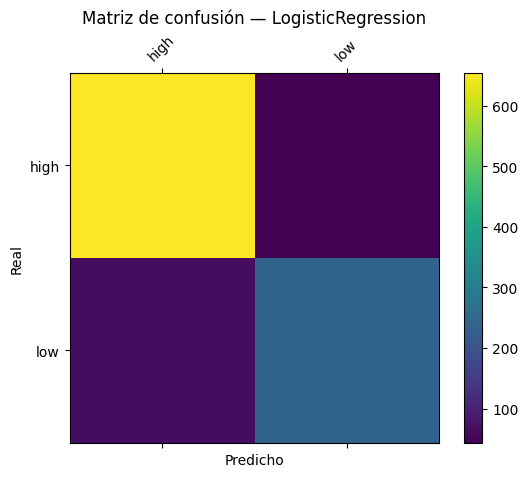

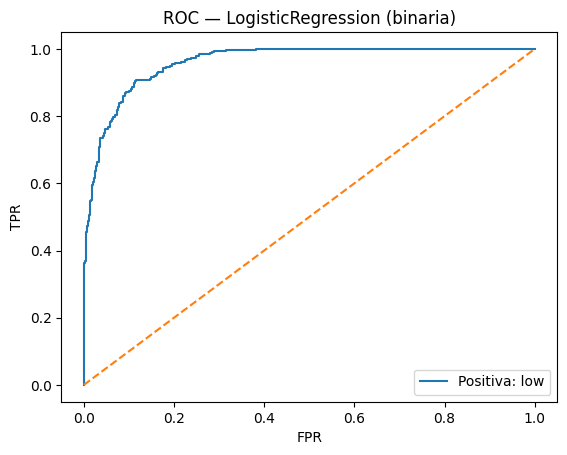


 RandomForest
Accuracy: 0.994 | F1-macro: 0.993 | F1-weighted: 0.994 | ROC AUC OvR: nan

Classification report:
              precision    recall  f1-score   support

        high       0.99      1.00      1.00       698
         low       0.99      0.99      0.99       302

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



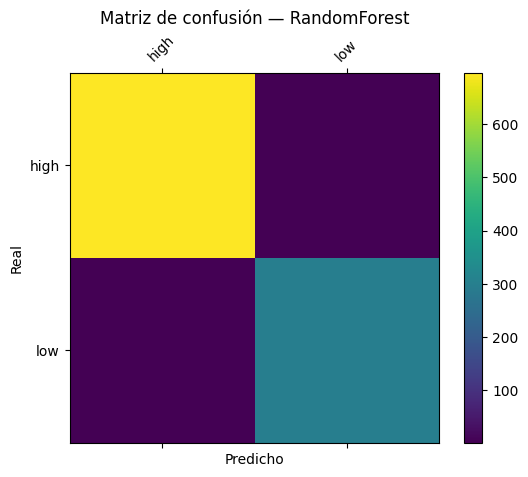

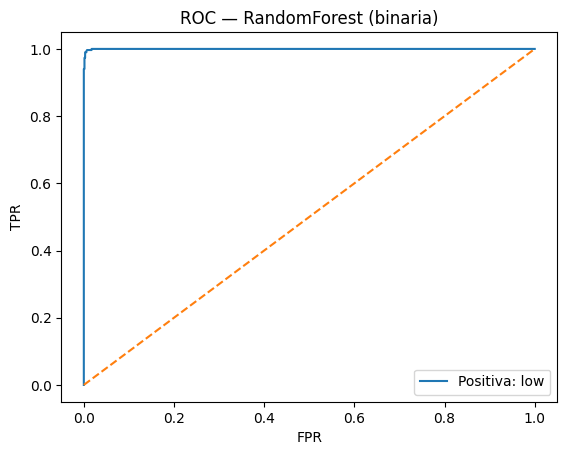


 Mejor modelo por F1-macro: RandomForest (0.993)


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score,
                             roc_curve, accuracy_score, f1_score, precision_score, recall_score)
from sklearn.preprocessing import label_binarize

results = {}

def safe_roc_auc_ovr(y_true, y_proba, classes):
    """
    Calcula ROC-AUC OvR de forma segura (siempre que haya al menos 2 clases en y_true).
    Devuelve np.nan si no se puede calcular.
    """
    try:
        if y_proba is None:
            return np.nan
        if len(np.unique(y_true)) < 2:
            # No hay positivos/negativos suficientes en y_true
            return np.nan
        # y_proba shape debe coincidir con n_clases
        if y_proba.shape[1] != len(classes):
            return np.nan
        return roc_auc_score(y_true, y_proba, multi_class="ovr")
    except Exception:
        return np.nan

for name, model in {"LogisticRegression": logreg, "RandomForest": rf}.items():
    model.fit(X_train, y_train)
    y_pred  = model.predict(X_test)
    y_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

    # Clases aprendidas por el clasificador (orden de columnas en predict_proba)
    if "clf" in model.named_steps:
        classes = model.named_steps["clf"].classes_
    else:
        classes = np.unique(y_train)

    # Métricas globales
    acc  = accuracy_score(y_test, y_pred)
    f1m  = f1_score(y_test, y_pred, average="macro", zero_division=0)
    f1w  = f1_score(y_test, y_pred, average="weighted", zero_division=0)
    prec = precision_score(y_test, y_pred, average="macro", zero_division=0)
    rec  = recall_score(y_test, y_pred, average="macro", zero_division=0)
    cm   = confusion_matrix(y_test, y_pred, labels=classes)

    auc_ovr = safe_roc_auc_ovr(y_test, y_proba, classes)

    results[name] = {
        "model": model, "acc": acc, "f1_macro": f1m, "f1_weighted": f1w,
        "precision_macro": prec, "recall_macro": rec, "auc_ovr": auc_ovr,
        "cm": cm, "classes": classes, "y_pred": y_pred, "y_proba": y_proba
    }

    print(f"\n {name}")
    print(f"Accuracy: {acc:.3f} | F1-macro: {f1m:.3f} | F1-weighted: {f1w:.3f} | ROC AUC OvR: {auc_ovr:.3f}")
    print("\nClassification report:")
    print(classification_report(y_test, y_pred, zero_division=0))

    # Matriz de confusión (orden consistente con 'classes')
    plt.figure()
    plt.matshow(cm, fignum=0)
    plt.title(f"Matriz de confusión — {name}")
    plt.xlabel("Predicho"); plt.ylabel("Real")
    plt.xticks(range(len(classes)), classes, rotation=45)
    plt.yticks(range(len(classes)), classes)
    plt.colorbar()
    plt.show()

    # ===== Curvas ROC =====
    # Solo si hay predict_proba y al menos 2 clases en y_test
    if (y_proba is not None) and (len(np.unique(y_test)) >= 2):
        # Caso BINARIO (2 clases): tomar la columna de la clase "positiva"
        if len(classes) == 2:
            # Elige como positiva la clase minoritaria en y_test (más informativa)
            vals, counts = np.unique(y_test, return_counts=True)
            minority_class = vals[np.argmin(counts)]
            try:
                pos_idx = list(classes).index(minority_class)
            except ValueError:
                # fallback: usa la segunda columna
                pos_idx = 1 if y_proba.shape[1] > 1 else 0

            # Verifica que haya ambos estados (pos/neg) para la curva
            y_bin = (y_test == classes[pos_idx]).astype(int)
            if y_bin.sum() > 0 and (y_bin == 0).sum() > 0 and y_proba.shape[1] > pos_idx:
                fpr, tpr, _ = roc_curve(y_bin, y_proba[:, pos_idx])
                plt.figure()
                plt.plot(fpr, tpr, label=f"Positiva: {classes[pos_idx]}")
                plt.plot([0,1],[0,1],'--')
                plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title(f"ROC — {name} (binaria)")
                plt.legend()
                plt.show()

        # Caso MULTICLASE (>=3): OvR por clase, solo si y_test tiene positivos y negativos para esa clase
        elif len(classes) >= 3 and y_proba.shape[1] == len(classes):
            # Binariza contra cada clase, salta si y_test carece de positivos/negativos
            for i, cls in enumerate(classes):
                y_test_bin = (y_test == cls).astype(int)
                if y_test_bin.sum() == 0 or (y_test_bin == 0).sum() == 0:
                    # No se puede trazar ROC para esta clase en este split
                    continue
                fpr, tpr, _ = roc_curve(y_test_bin, y_proba[:, i])
                plt.figure()
                plt.plot(fpr, tpr, label=f"Clase {cls}")
                plt.plot([0,1],[0,1],'--')
                plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title(f"ROC — {name} (OvR)")
                plt.legend()
                plt.show()

# Elegir mejor por F1-macro
best_name = max(results, key=lambda k: results[k]["f1_macro"])
best_model = results[best_name]["model"]
print(f"\n Mejor modelo por F1-macro: {best_name} ({results[best_name]['f1_macro']:.3f})")


#Despliegue

In [33]:
os.makedirs("outputs", exist_ok=True)

# Guardar modelo .pkl
pkl_path = os.path.join("outputs", f"best_model_{str(best_name)}.pkl")
joblib.dump(best_model, pkl_path)
print("Modelo guardado en:", pkl_path)

# CSV de predicciones y probabilidades
classes = results[best_name]["classes"]
y_pred  = results[best_name]["y_pred"]
y_proba = results[best_name]["y_proba"]

out_df = pd.DataFrame({
    "index": X_test.index,
    "y_true": y_test.values,
    "y_pred": y_pred
})

if y_proba is not None:
    for i, cls in enumerate(classes):
        out_df[f"proba_{cls}"] = y_proba[:, i]

csv_path = os.path.join("outputs", "predicciones_test.csv")
out_df.to_csv(csv_path, index=False)
print("Predicciones guardadas en:", csv_path)
out_df.head()


Modelo guardado en: outputs/best_model_RandomForest.pkl
Predicciones guardadas en: outputs/predicciones_test.csv


,index,y_true,y_pred,proba_high,proba_low
0,3572,low,low,0.0775,0.9225
1,4640,high,high,0.9700,0.0300
2,4590,low,low,0.0975,0.9025
3,3192,high,high,0.9950,0.0050
4,231,high,high,0.9575,0.0425
